## **How to follow the tutorial:**

**Please read the textual description above each code and then run the code with the *circle* button at top left of each cell.** 

**This guide might serve as a source of inspiration (or starting point) for your own modifications.**

---



# **Install the [rdflib](https://rdflib.readthedocs.io/en/stable/)** **library**.
**We need this library to make an RDF document.**

*  **Firstly, we make a graph.**
*  **Secondly, we add facts into it.**
*  **Lastly, we serialize this graph with the [Turtle](https://www.w3.org/TR/turtle/) format.**




 


In [20]:
!pip install rdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**It is recommended to upload the place-holder files to your google drive and load them to this Colab notebook. Therefore, you need to firstly mount your google drive to this google Colab notebook (it is going to be only visible for you).**
**To connect this notebook to your google drive, run the following command. Google, will ask for authentication. After this step, you will see your drive at left side of this page.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**[Here](https://github.com/OpenEnergyPlatform/oekg/tree/main/place-holders) you can find a set of .json files which serve as intermediate data structues between the study reports and the final RDF document. In the following steps, we read these .json files and make the final RDF document based on the content of these files. After copying the .json files into your google drive, you can copy their path by right-clicking on their names in the left side of this web-page and choosing 'copy path'**

In [3]:
import json
file_KSz_2050 = open("a/path/in/your/google/drive/KSz_2050.json")
place_holders_KSz_2050 = json.load(file_KSz_2050)

file_BDI = open("a/path/in/your/google/drive/OEKG/BDI.json")
place_holders_BDI = json.load(file_BDI)

file_Zukunft = open("a/path/in/your/google/drive/Zukunft.json")
place_holders_Zukunft = json.load(file_Zukunft)

file_Politikszenarien_VIII = open("a/path/in/your/google/drive/Politikszenarien_VIII.json")
place_holders_Politikszenarien_VIII = json.load(file_Politikszenarien_VIII)

file_ESBB = open("a/path/in/your/google/drive/OEKG/ESBB.json")
place_holders_ESBB = json.load(file_ESBB)

file_Trafo_FW = open("a/path/in/your/google/drive/Trafo_FW.json")
place_holders_Trafo_FW = json.load(file_Trafo_FW)

**Import the necessary parts of the rdflib library.**

In [21]:
from rdflib import Graph, Literal, RDF, URIRef, BNode
from rdflib.namespace import XSD, Namespace

**Define the necessary namespaces.**
**For more information about the namespaces, please read more [here](https://www.w3.org/TR/rdf11-concepts/)**

In [5]:
OEO = Namespace("http://openenergy-platform.org/ontology/oeo/")
OEO_KG = Namespace("http://openenergy-platform.org/oekg/")
OBO = Namespace("http://purl.obolibrary.org/obo/") 
DC = Namespace("http://purl.org/dc/terms/")
RDFS = Namespace("http://www.w3.org/2000/01/rdf-schema#")
NPG = Namespace("http://ns.nature.com/terms/")
SCHEMA = Namespace("https://schema.org/")
OEKG = Namespace("http://openenergy-platform.org/ontology/oekg/")
DBO = Namespace("http://dbpedia.org/ontology/")

**Bind these name spaces to our graph. We only have one graph and we name it "g".**

In [6]:
g = Graph()
g.bind("OEO", OEO)
g.bind("OEO_KG", OEO_KG)
g.bind("OBO", OBO)
g.bind("DC", DC)
g.bind("RDFS", RDFS)
g.bind("NPG", NPG)
g.bind("SCHEMA", SCHEMA)
g.bind("OEKG", OEKG)
g.bind("DBO", DBO)

**Here is how we define scenario years as entities in our knowledge graph.**

In [7]:
Scenario_Year_2015 = URIRef("http://openenergy-platform.org/ontology/oekg/scenario_year_2015")
Scenario_Year_2020 = URIRef("http://openenergy-platform.org/ontology/oekg/scenario_year_2020")
Scenario_Year_2025 = URIRef("http://openenergy-platform.org/ontology/oekg/scenario_year_2025")
Scenario_Year_2030 = URIRef("http://openenergy-platform.org/ontology/oekg/scenario_year_2030")
Scenario_Year_2035 = URIRef("http://openenergy-platform.org/ontology/oekg/scenario_year_2035")
Scenario_Year_2040 = URIRef("http://openenergy-platform.org/ontology/oekg/scenario_year_2040")
Scenario_Year_2045 = URIRef("http://openenergy-platform.org/ontology/oekg/scenario_year_2045")
Scenario_Year_2050 = URIRef("http://openenergy-platform.org/ontology/oekg/scenario_year_2050")

scenario_years_dictionary = {
  "2015": Scenario_Year_2015,
  "2020": Scenario_Year_2020,
  "2025": Scenario_Year_2025, 
  "2030": Scenario_Year_2030,  
  "2035": Scenario_Year_2035,  
  "2040": Scenario_Year_2040,  
  "2045": Scenario_Year_2045,  
  "2050": Scenario_Year_2050,     
}

for k, v in scenario_years_dictionary.items():
  g.add((v, RDF.type, OEO.OEO_00020097 ))
  g.add((v, OEO.OEO_00140178, Literal(k) ))
  g.add((v, OEO.OEO_00040010, OEO.UO_0000036 ))

**In RDF documents, everything should have a URI, Some characters such as '%', "O" and ... will cause some errors as the URI should not contain some characters. The following function will replace those characters with some other characters which are fine for URIs.**

In [8]:
def clean_name(name):
  return name.rstrip().lstrip().replace("-","_").replace(" ","_").replace("%","").replace("Ö","Oe").replace("ö","oe").replace("/","_").replace(":","_").replace("(","_").replace(")","_")

**The following function is the main function of this tutorial. Given a place-holder as its argument, we add facts to our knowledge graph according to the values in the place-holder object. Each fact is a triple with the form of (object, predicate, subject).**

In [9]:
def populate_KG(place_holders):
  for k, v in place_holders.items():
    study =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) )
    g.add(( study, RDF.type, OEO.OEO_00000364))
    g.add(( study, DC.title, Literal(v["title"]) ))
    g.add(( study, DBO.subtitle, Literal(v["sub-title"]) ))
    g.add(( study, OEO["abbreviation"], Literal(v["abbreviation"]) ))
    g.add(( study, DC.abstract, Literal(v["abstract"]) ))
    g.add(( study, SCHEMA.url, Literal(v["URL"]) ))

    for author in v["authors"]:
      author_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(author) )
      g.add(( author_URI, RDF.type, OEO.OEO_00000064 ))
      g.add(( study, OEO.OEO_00000506, author_URI ))
      
    institution_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + "institution")
    g.add(( institution_URI, RDF.type, OEO.OEO_00000238 ))
    g.add(( institution_URI, DC.title, Literal(v["institution"]["name"]) ))
    g.add(( study, OEO.OEO_00000510, institution_URI ))
    
    funding_source_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + "funding_source")
    g.add(( funding_source_URI, RDF.type, OEO.OEO_00090001 ))
    g.add(( funding_source_URI, DC.title, Literal(v["funding source"]["name"]) ))
    g.add(( study, OEO.RO_0002234, funding_source_URI ))

    study_report_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_report")
    g.add(( funding_source_URI, RDF.type, OEO.OEO_00090001 ))
    g.add(( funding_source_URI, OEO.OEO_00000506, author_URI ))
    g.add(( funding_source_URI, OEO.RO_0002353, author_URI ))
    g.add(( funding_source_URI, OEO.IAO_0000136, Literal(v["study report"]["publication year"]) ))
    g.add(( study_report_URI, OEO.RO_0002353, study ))
    g.add(( study, OEO.OEO_00000509, study_report_URI ))

    resolution_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_resolution")
    g.add(( resolution_URI, RDF.type, OEO.OEO_00020121 ))
    if (v["resolution"]["name"] == "Year"):
      g.add(( resolution_URI, OEO.OEO_00040010, OEO[v["resolution"]["id"]] ))
    if (v["resolution"]["name"] == "Hour"):
      g.add(( resolution_URI, OEO.OEO_00040010, OEO[v["resolution"]["id"]] ))
    g.add(( resolution_URI, RDFS.label, OEO[v["resolution"]["name"]] ))
    g.add(( study, OEO.OEO_00000514, resolution_URI ))

    for model in v["used models"]:
      model_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_" + clean_name(model))
      g.add(( model_URI, RDF.type, OEO.OEO_00000274 ))
      g.add(( model_URI, DC.title, Literal( model ) ))
      g.add(( study, OEO.RO_0002615, model_URI ))

    scenario_horizon = URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_scenario_horizon")
    g.add((scenario_horizon, RDF.type, OEO.OEO_00020098))
    g.add((study, OEO.BFO_0000051, scenario_horizon))

    scenario_horizon_duration = URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_duration")
    g.add((scenario_horizon_duration, RDF.type, OEO.OEO_00030035))
    if (v["scenario horizon"]["duration"]["unit"] == "year"):
      g.add((scenario_horizon_duration, OEO.OEO_00040010, OEO.UO_0000036))
    g.add((scenario_horizon_duration, OEO.OEO_00140178, Literal(v["scenario horizon"]["duration"]["value"], datatype=XSD.integer)))
    g.add((scenario_horizon, OEO.BFO_0000051, scenario_horizon_duration))

    scenario_horizon_start_time = BNode()
    g.add((scenario_horizon, OEO.BFO_0000051, scenario_horizon_start_time))
    g.add((scenario_horizon_start_time, RDF.type, OEO.OEO_00030031))
    scenario_horizon_start_time_value = v["scenario horizon"]["duration"]["start time"]
    g.add((scenario_horizon_start_time, OEO.OEO_00140178, Literal(scenario_horizon_start_time_value, datatype=XSD.integer)))
    
    scenario_horizon_end_time = BNode()
    g.add((scenario_horizon, OEO.BFO_0000051, scenario_horizon_end_time))
    g.add((scenario_horizon_end_time, RDF.type, OEO.OEO_00030032))
    scenario_horizon_ending_time_value = v["scenario horizon"]["duration"]["ending time"]
    g.add((scenario_horizon_end_time, OEO.OEO_00140178, Literal(scenario_horizon_ending_time_value, datatype=XSD.integer)))
    
    for scenario_year in  v["scenario years"]:
      g.add((scenario_horizon, OEO.BFO_0000051, scenario_years_dictionary[scenario_year]))

    analysis_scope_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_analysis_scope")
    g.add(( analysis_scope_URI, RDF.type, OEO.OEO_00020072 ))

    study_region_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_regions")
    g.add(( study_region_URI, RDF.type, OEO.OEO_00020032 ))
    g.add(( study_region_URI, OEO.IAO_0000136, Literal(v["study region"]) ))
    g.add(( analysis_scope_URI, OEO.IAO_0000136, study_region_URI  ))

    for sector in  v["sectors"]:
      sector_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(sector["name"]))
      g.add(( sector_URI, RDF.type, OEO[str(sector["id"])] ))
      g.add(( sector_URI, RDF.type, OEO[str(sector["id"])] ))
      g.add(( sector_URI, RDFS.label, Literal(sector["name"]) ))
      g.add(( analysis_scope_URI, OEO.OEO_00000505, sector_URI  ))

    for energy_carrier in  v["energy carriers"]:
      energy_carrier_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(energy_carrier["name"]))
      g.add(( energy_carrier_URI, RDF.type, OEO[energy_carrier["id"]] ))
      g.add(( energy_carrier_URI, RDFS.label, Literal(energy_carrier["name"]) ))
      g.add(( analysis_scope_URI, OEO.OEO_00000505, energy_carrier_URI  ))

    g.add(( study, OEO.OEO_00000522, analysis_scope_URI ))

    model_outputs_URI = URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_model_outputs")
    g.add(( model_outputs_URI, RDF.type, OEO.OEO_00020013 ))
    for modeling_output_type, modeling_output_value in v["modeling results"].items():
      for model_output in modeling_output_value:
        modeling_output_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(model_output["name"]))
        g.add(( modeling_output_URI, RDF.type, OEO[model_output["id"]] ))
        g.add(( modeling_output_URI, RDFS.label, Literal(model_output["name"]) ))
        g.add(( model_outputs_URI, OEO.IAO_0000136, modeling_output_URI  ))

    g.add(( study, OEO.BFO_0000051, model_outputs_URI ))

    model_inputs_URI = URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(k) + "_model_inputs")
    g.add(( model_inputs_URI, RDF.type, OEO.OEO_00030029 ))
    for modeling_input_type, modeling_input_value in v["modeling inputs"].items():
      for model_input in modeling_input_value:
        modeling_input_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(model_input["name"]))
        g.add(( modeling_input_URI, RDF.type, OEO[model_input["id"]] ))
        g.add(( modeling_input_URI, RDFS.label, Literal(model_input["name"]) ))
        g.add(( model_inputs_URI, OEO.IAO_0000136, modeling_input_URI ))

    g.add(( study, OEO.BFO_0000051, model_inputs_URI ))

    for scenario in v["scenarios"]:
      scenario_URI =  URIRef("http://openenergy-platform.org/ontology/oekg/" + clean_name(scenario["name"]))
      g.add(( scenario_URI, RDF.type, OEO.OEO_00000364 ))
      g.add(( scenario_URI, RDFS.label, Literal(clean_name(scenario["name"])) ))
      g.add(( scenario_URI, OEO["abbreviation"], Literal(clean_name(scenario["abbreviation"])) ))
      g.add(( scenario_URI, OEO.IAO_0000115,  Literal(clean_name(scenario["definition"])) ))
      g.add(( scenario_URI, DC.type, Literal(scenario["type"]) ))
      g.add(( scenario_URI, OEO.IAO_0000136, analysis_scope_URI ))
      g.add(( study, OEO.OEO_00000503, scenario_URI ))
    
    return k + " " + "Done!"

**In the following cells, we call the "populate_KG()" function with our place-holders as the argument. Each place-holder is for a study report. We add all study reports to a single graph namely as 'g'**

In [10]:
populate_KG(place_holders_KSz_2050)

'klimaschutzszenario_2050 Done!'

In [11]:
populate_KG(place_holders_BDI)

'Klimapfade für Deutschland Done!'

In [12]:
populate_KG(place_holders_Zukunft)

'Zukunft Stromsystem Done!'

In [13]:
populate_KG(place_holders_Politikszenarien_VIII)

'Politikszenarien VIII Done!'

In [14]:
populate_KG(place_holders_ESBB)

'Untersuchungen zur Energiestrategie Brandenburgs Done!'

In [15]:
populate_KG(place_holders_Trafo_FW)

'Trafo FW Done!'

**With the following code, we serialize our graph as a turtle file.**

In [16]:
g.serialize(destination='OEKG_V1.ttl', format='turtle')

<Graph identifier=N8764e230141d4dbba12a62be584fdf4f (<class 'rdflib.graph.Graph'>)>

**To see all triple inside the graph, run the following code:**

In [ ]:
for index, (sub, pred, obj) in enumerate(g):
  print(index, sub, pred, obj)

**You can check the length of the graph by the following code:**

In [18]:
len(g)

948

**The following two cells are for visualizing the graph that we have made so far.** **After running the last cell, you will see a big picture which shows the knowledge graph. You should zoom-in to see the details.**

In [19]:
!pip install pydotplus
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.40106 to fit



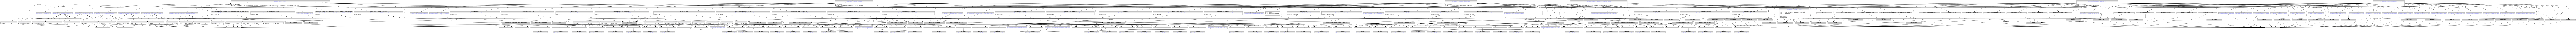

In [22]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)